In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [40]:
with open('CH06PR05.txt') as f:
    data = f.readlines()
df = pd.DataFrame(list(map(lambda x: x.split(), data)))
df.columns = ['brand_like_degree', 'moisture_content', 'sweetness']
df = df.astype(float)
df.head()

,brand_like_degree,moisture_content,sweetness
0,64.0,4.0,2.0
1,73.0,4.0,4.0
2,61.0,4.0,2.0
3,76.0,4.0,4.0
4,72.0,6.0,2.0


## a

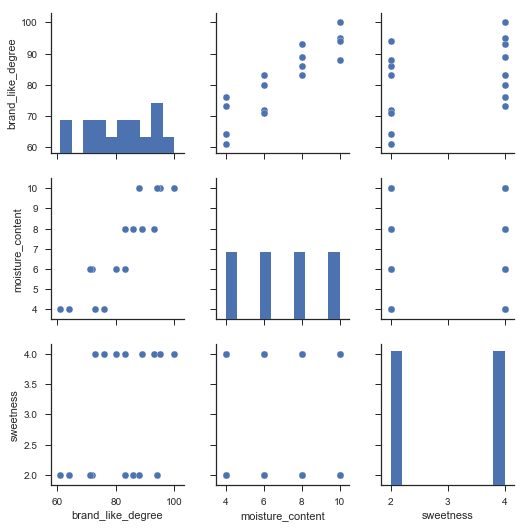

In [41]:
sns.pairplot(df)

In [43]:
df.corr()

,brand_like_degree,moisture_content,sweetness
brand_like_degree,1.000000,0.892393,0.394581
moisture_content,0.892393,1.000000,0.000000
sweetness,0.394581,0.000000,1.000000


## b

In [65]:
from statsmodels.formula.api import ols
model = ols('brand_like_degree~moisture_content + sweetness', df).fit()
print(model.summary())
print(model._results.params)

                            OLS Regression Results                            
Dep. Variable:      brand_like_degree   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     129.1
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           2.66e-09
Time:                        21:54:25   Log-Likelihood:                -36.894
No. Observations:                  16   AIC:                             79.79
Df Residuals:                      13   BIC:                             82.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           37.6500      2.996  

G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [96]:
print('R square:', round(model.rsquared, 6))

R square: 0.952059


In [97]:
SStotal = sum((df['brand_like_degree'] - df['brand_like_degree'].mean())**2)
SSreg = sum((model.fittedvalues - df['brand_like_degree'].mean())**2)
SSres = SStotal - SSreg
R2 = SSreg/SStotal
round(R2, 6)

0.952059

In [188]:
test = np.array([[1.732, 2.56], [6.431, 9.33]])
np.linalg.inv(test)

array([[-30.71099408,   8.42659645],
       [ 21.16853193,  -5.70111916]])

In [171]:
from scipy.stats import t
MSE = SSres/(len(df)-3)
xh = np.array([1, 5, 4])
b = np.array([37.65, 4.425, 4.375])
yh = np.dot(xh.T, b)
t = t.ppf(0.995, len(df)-3)
X = df[['moisture_content', 'sweetness']].values
X = np.hstack([np.ones(len(df)).reshape(-1, 1), X])
ciup = yh + t*np.sqrt(MSE)*np.sqrt(np.dot(np.dot(np.sqrt(xh.T), np.linalg.inv(np.dot(X.T, X))), xh))
cilow = yh - t*np.sqrt(MSE)*np.sqrt(np.dot(np.dot(np.sqrt(xh.T), np.linalg.inv(np.dot(X.T, X))), xh))
round(cilow,3), round(ciup,3)

(74.475, 80.075)

In [177]:
ciup = yh + t*np.sqrt(MSE)*np.sqrt(1 + np.dot(np.dot(np.sqrt(xh.T), np.linalg.inv(np.dot(X.T, X))), xh))
cilow = yh - t*np.sqrt(MSE)*np.sqrt(1 + np.dot(np.dot(np.sqrt(xh.T), np.linalg.inv(np.dot(X.T, X))), xh))
round(cilow,3), round(ciup,3)

(68.693, 85.857)